## Prediction of House Prices using Multiple Linear Regression

Let us first import some libraries as follows

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
housing = pd.read_csv('Housing.csv')

Let us inspect the dataframe as follows

In [3]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


- It can be observed that the data set contains both numerical as well as categorical variables.
- Another thing that can be observed in the case of numerical variables is the huge difference in the scales.

Let us first deal with categorical variables having two distinct values i.e. `yes` and `no` and replace them with `1` and `0` respectively.

In [4]:
housing.select_dtypes(include='object').nunique() == 2

mainroad             True
guestroom            True
basement             True
hotwaterheating      True
airconditioning      True
prefarea             True
furnishingstatus    False
dtype: bool

The categorical variables that have 2 distinct categories are:
- `mainroad`
- `guestroom`
- `basement`
- `hotwaterheating`
- `airconditioning`
- `prefarea`

In [5]:
binary_categorical = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
housing[binary_categorical] = housing[binary_categorical].apply(lambda x : x.map({'yes':1, 'no':0}))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


Now inspecting the categorical variable `furnishingstatus` as follows

In [6]:
np.unique(housing['furnishingstatus'])

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

It can be observed that the variable `furnishingstatus` has three distinct categories. Therefore we can use dummy variables to address this issue.

In [7]:
dummy = pd.get_dummies(housing['furnishingstatus'], drop_first=True)

In [8]:
housing = pd.concat([housing, dummy], axis = 1)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [9]:
housing.drop('furnishingstatus', axis = 1, inplace = True)

In [10]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


Let us first divide our data into a train set and a test set

In [11]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.7, random_state=100)

In [12]:
print(df_train.shape)
print(df_test.shape)

(381, 14)
(164, 14)


It can be observed that the variable `price` and `area` are on different scales respectively as compared to other numerical variables. Therefore, a better approach would be to compress the numercial variables between 0 to 1.

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [14]:
housing.select_dtypes(exclude='object').nunique()>2

price               True
area                True
bedrooms            True
bathrooms           True
stories             True
mainroad           False
guestroom          False
basement           False
hotwaterheating    False
airconditioning    False
parking             True
prefarea           False
semi-furnished     False
unfurnished        False
dtype: bool

Therefore, the numercial variables that we will be scaling are:
- `price`
- `area`
- `bedrooms`
- `bathrooms`
- `stories`
- `parking`

In [15]:
var_scale = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
df_train[var_scale] = scaler.fit_transform(df_train[var_scale])
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


In [16]:
X_train = df_train.iloc[:, 1:]
y_train = df_train.iloc[:, 0]

Making predictions first considering all the variables and then subsequently eliminating as follows

In [17]:
import statsmodels.api as sm

In [18]:
X_train_sm = sm.add_constant(X_train)

In [19]:
lr_1 = sm.OLS(y_train, X_train_sm).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     60.40
Date:                Tue, 31 Dec 2019   Prob (F-statistic):           8.83e-83
Time:                        18:30:51   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -735.6
Df Residuals:                     367   BIC:                            -680.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0200      0.021     

It can be observed that the p-value of the variable `semi-furnished` is very high and hence can be removed. But let us also consider the `variance inflation factor` (VIF) before making this decision.

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [21]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
1,bedrooms,7.33
4,mainroad,6.02
0,area,4.67
3,stories,2.70
11,semi-furnished,2.19
9,parking,2.12
6,basement,2.02
12,unfurnished,1.82
8,airconditioning,1.77
2,bathrooms,1.67


Variable `bedroom` has the highest VIF value and the variable `semi-furnished` has a low VIF value of 2.19. 

Let us first remove the varible `semi-furnished` as it has a very high p-value.

In [22]:
X_train.drop('semi-furnished', axis=1, inplace=True)

Now, again training the model (without `semi-furnished`) as follows

In [23]:
X_train_sm = sm.add_constant(X_train)
lr_2 = sm.OLS(y_train, X_train_sm).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     65.61
Date:                Tue, 31 Dec 2019   Prob (F-statistic):           1.07e-83
Time:                        18:30:51   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -737.6
Df Residuals:                     368   BIC:                            -686.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0207      0.019     

In [24]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
1,bedrooms,6.59
4,mainroad,5.68
0,area,4.67
3,stories,2.69
9,parking,2.12
6,basement,2.01
8,airconditioning,1.77
2,bathrooms,1.67
10,prefarea,1.51
5,guestroom,1.47


Now removing the variable `bedrooms` as its p-value is also on the higher side (0.206)

In [25]:
X_train.drop(['bedrooms'], axis=1, inplace=True)

In [26]:
X_train_sm = sm.add_constant(X_train)
lr_3 = sm.OLS(y_train, X_train_sm).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     71.31
Date:                Tue, 31 Dec 2019   Prob (F-statistic):           2.73e-84
Time:                        18:30:52   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -737.9
Df Residuals:                     369   BIC:                            -690.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0357      0.015     

In [27]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,mainroad,4.79
0,area,4.55
2,stories,2.23
8,parking,2.10
5,basement,1.87
7,airconditioning,1.76
1,bathrooms,1.61
9,prefarea,1.50
4,guestroom,1.46
10,unfurnished,1.33


- To a larger extent, now it ca be considered that the `p-value` and `VIF` are within acceptable ranges.<br><br>

- Another point to note is that the value of `R-squared` and `Adj. R-squared` have not dropped from one model to another suggesting that the variables that were dropped have no significant impact on predictions.

Before we make our predictions on the test data, let us check the distribution of residuals as follows.

In [28]:
y_train_pred = lr_3.predict(X_train_sm)

In [29]:
residuals = y_train - y_train_pred

Plotting Histogram to check the distribution of residuals as follows

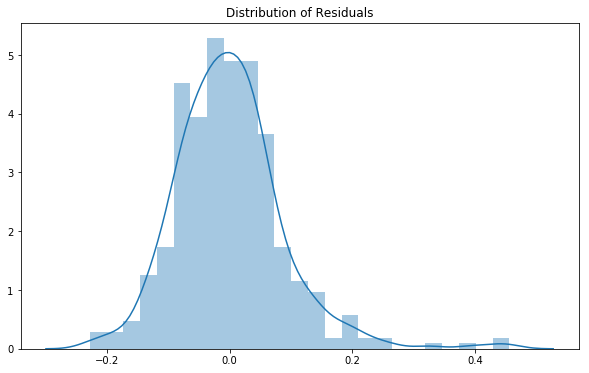

In [30]:
plt.figure(figsize=(10,6))
sns.distplot(residuals)
plt.title('Distribution of Residuals')
plt.show()

It is observed that the residuals follows a Normal Distribution indicating that our analysis has been in the right direction.

Let us now make prediction on our test data.

In [31]:
df_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,4403000,2880,3,1,2,1,0,0,0,0,0,1,1,0
54,7350000,6000,3,2,2,1,1,0,0,1,1,0,1,0
171,5250000,10269,3,1,1,1,0,0,0,0,1,1,1,0
244,4550000,5320,3,1,2,1,1,1,0,0,0,1,1,0
268,4382000,4950,4,1,2,1,0,0,0,1,0,0,1,0


Before making predictions, let us transform the necessary numerical variables

In [32]:
df_test[var_scale] = scaler.transform(df_test[var_scale])

In [33]:
df_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,0.229697,0.091869,0.4,0.0,0.333333,1,0,0,0,0,0.000000,1,1,0
54,0.484848,0.366420,0.4,0.5,0.333333,1,1,0,0,1,0.333333,0,1,0
171,0.303030,0.742080,0.4,0.0,0.000000,1,0,0,0,0,0.333333,1,1,0
244,0.242424,0.306582,0.4,0.0,0.333333,1,1,1,0,0,0.000000,1,1,0
268,0.227879,0.274023,0.6,0.0,0.333333,1,0,0,0,1,0.000000,0,1,0


First, removing the variables `semi-furnished` and `bedrooms` from the test data

In [34]:
df_test.drop(['semi-furnished', 'bedrooms'], axis=1, inplace=True)

In [35]:
X_test = df_test.iloc[:, 1:]
y_test = df_test.iloc[:, 0]

In [36]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr_3.predict(X_test_sm)

In [37]:
y_test_pred

265    0.204980
54     0.425613
171    0.339321
244    0.309397
268    0.254629
231    0.195475
25     0.541285
169    0.336916
494    0.154745
120    0.337262
368    0.114301
78     0.386443
523    0.241655
125    0.477291
150    0.339812
195    0.439253
3      0.551976
272    0.226700
40     0.371241
117    0.258905
454    0.213017
326    0.074089
260    0.238652
486    0.170536
405    0.077487
504    0.146602
254    0.287455
104    0.414019
331    0.411690
15     0.275618
         ...   
416    0.151375
100    0.398946
7      0.584651
333    0.147815
429    0.152165
18     0.417651
480    0.129890
505    0.202688
236    0.258787
452    0.313672
502    0.139438
198    0.275245
400    0.167425
378    0.384668
175    0.458534
55     0.264959
519    0.153507
229    0.458747
410    0.093806
221    0.254731
61     0.317518
345    0.211028
379    0.188547
355    0.258929
464    0.286161
413    0.275609
191    0.360889
310    0.194143
46     0.474017
50     0.464556
Length: 164, dtype: floa

Plotting scatterplot to visualize the correlation between the actual data and predictions as follows

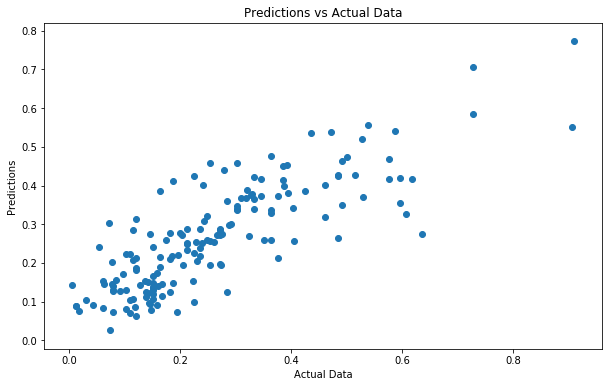

In [38]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_test_pred)
plt.title('Predictions vs Actual Data')
plt.xlabel('Actual Data')
plt.ylabel('Predictions')
plt.show()

Therefore, the equation that can be written in order to describe the model is as follows:

***price = 0.0357 + 0.2347 x area + 0.1965 x bathrooms + 0.1178 x stories + 0.0488 x mainroad + 0.0301 x guestroom + 0.0239 x basement + 0.0864 x hotwaterheating + 0.0665 x airconditioning + 0.0629 x parking + 0.0596 x prefarea - 0.0323 x unfurnished*** 